# Implementation of Perelson et al.

In this implementation we're going to evaluate the properties of a [dynamical model](https://www.jstor.org/stable/2890727).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

### (1) Reproduce all four panels from Figure 1 shown in Perelson et al. using eq. 6

Since we are not given any empirical data, use the fitted parameters and the appropriate constants to generate the curves shown on these plots. Remember to account for the time delays for each patient.

#### (i) Implement eq. 6 from the paper as a function.

In [12]:
def equation_6(tps: np.ndarray, v0: float, c: float, delta: float, delay: float, scale: float=1.0):
    """It may help to structure your equation with these inputs,
    and output an array of predictions over time."""
    v0=v0*scale
    t = tps
    # t = (tps-delay) #but doing this creates some negative values for t which makes the graphs a little off
    v1 = v0*np.exp(-c*t)
    vn1 =(c*v0)/(c-delta)*(  c/(c-delta) * ( np.exp(-delta*t) - np.exp(-c*t) ) - delta*t*np.exp(-c*t))
    v1[tps < 0.0] = v0     
    vn1[tps < 0.0] = 0
    v = v1 + vn1
    
    # so the question is, how can we take the delay into account?
    # what if we try shifting the values of v1, vn1, and v?
    
    return v1, vn1, v

#### (ii) Make the plot from this function's values over time.

Note that some constants are given in other papers published by this lab. An estimate of k, the viral infectivity rate, can be found in Wein et al. (J. Theor. Biol. 192:81-98) to be $3.43\times10^{-8}$ mL/(virion•day). Note that you will need to solve ordinary differential equations for $T^*$, $V_I$, and $V_{NI}$ to reproduce the data in Figure 1.

Type of tps: <class 'numpy.ndarray'>


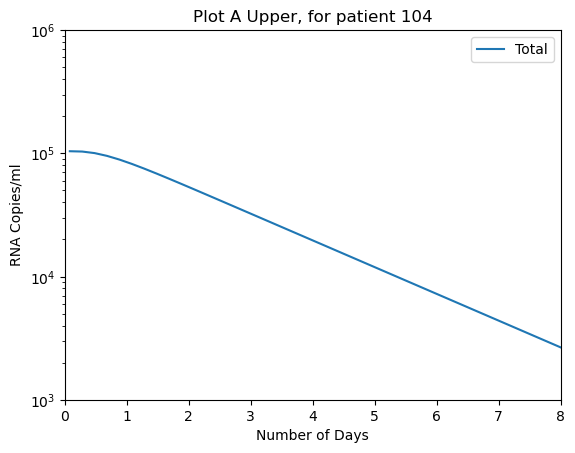

In [13]:
# Answer
tps = np.arange(0, 11, 0.2)
#patient 104
print("Type of tps:", type(tps))

delay = 2/24
v0 = 2*52* 10**3 #doubling then putting in right units

v1, vn1, v = equation_6(tps, v0, 3.68, 0.50, delay, 1)

# Plot A
plt.yscale('log')
plt.plot(tps+delay, v, label = 'Total') #manually shifting because of delay
plt.ylim(1e3, 1e6)
plt.xlim(0, 8)
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.title("Plot A Upper, for patient 104")
plt.legend()

Type of tps: <class 'numpy.ndarray'>


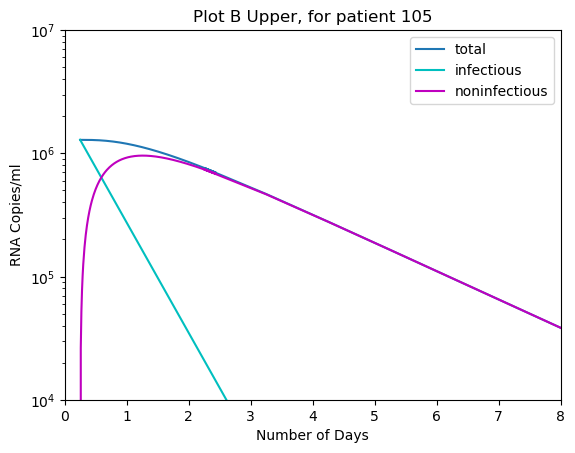

In [14]:
tps = np.concatenate([np.arange(0, 2.2, 0.01), np.arange(2, 11, 1)])
print("Type of tps:", type(tps))
delay = 6/24 #converting to hours
v0 = 2*643* 10**3 #doubling then putting in right units

v1, vn1, v = equation_6(tps, v0, 2.06, 0.53, delay, 1)
# (tps: np.ndarray, v0: float, c: float, delta: float, delay: float, scale: float=1.0):

plt.yscale('log')
plt.plot(tps+delay, v, label = 'total')
# plt.plot(tps[25:], v1[25:], color = 'c', label = 'infectious') 
plt.plot(tps+delay, v1, color = 'c', label = 'infectious') 
plt.plot(tps+delay, vn1, color = 'm', label = 'noninfectious')

plt.ylim(1e4, 1e7)
plt.xlim(0, 8)
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.title("Plot B Upper, for patient 105")
plt.legend()

Type of tps: <class 'numpy.ndarray'>


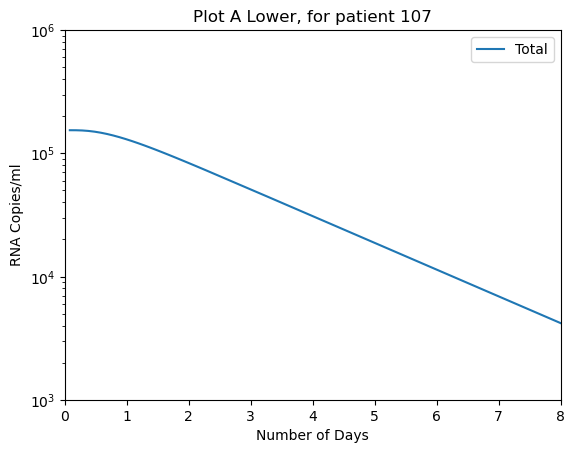

In [15]:
tps = np.concatenate([np.arange(0, 2.2, 0.1), np.arange(2.2, 9, 1)])
print("Type of tps:", type(tps))

v0 = 2*77*10**3 #doubling then putting in right units
delay = 2/24
v1, vn1, v = equation_6(tps, v0, 3.09, 0.50, 2/24, 1)
# (tps: np.ndarray, v0: float, c: float, delta: float, delay: float, scale: float=1.0):
# Plot C

plt.yscale('log')
plt.plot(tps + delay, v, label = 'Total')

plt.ylim(1e3, 1e6)
plt.xlim(0, 8)
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.title("Plot A Lower, for patient 107")
plt.legend()

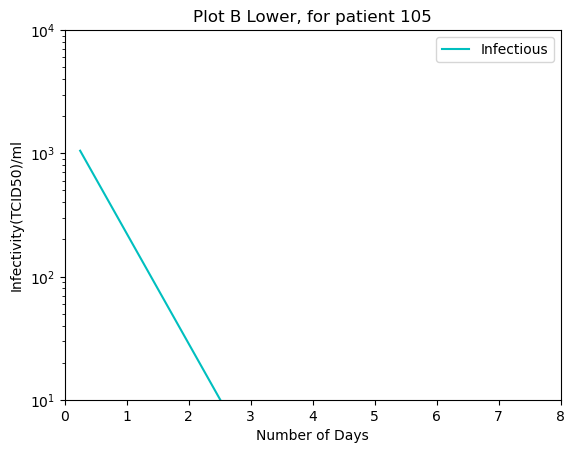

In [16]:
tps = np.concatenate([np.arange(0, 2.2, 0.2), np.arange(2, 11, 1)])

# (tps: np.ndarray, v0: float, c: float, delta: float, delay: float, scale: float=1.0):

delay = 6/24
v0 = 643*2*10**3

v1, vn1, v = equation_6(tps, v0, 2.06, 0.53, 6/24, 1)

plt.yscale('log')
plt.plot(tps+delay, (v1*1.05*10**3)/v0, color = 'c', label = 'Infectious') # already multipliedby 10^3 somewhere
# this is not right, - delay was already done in function

plt.ylim(1e1, 1e4)
plt.xlim(0, 8)
plt.xlabel("Number of Days")
plt.ylabel("Infectivity(TCID50)/ml")
plt.title("Plot B Lower, for patient 105")
plt.legend()

### (2) Can the ODE model of virion production before treatment show stable or unstable oscillations?

Justify your answer.

# take the jacobian, tells us what equations to use
"we can write out independent v * e^{lambda t} terms, since they are linearly independent. This property then translates to independent dynamical behavior for our analysis" --> which then tells us if they are stable or unstable

Yes, it can show us stable or unstable oscillations. We can write out the independent v * e^{lambda t} terms, since they are linearly independent. This property then translates to independent dynamical behavior for our analysis" --> which then tells us if they are stable or unstable.


In [17]:
from IPython.display import display, Math
equation1 = r'\frac{dT^*}{dt} = kVT - \delta T^*'
display(Math(equation1))

equation2 = r'\frac{dV}{dt} = N \delta T^*- cV'
display(Math(equation2))

print("Find where the derivatives are 0. For eq1, this happens when:")
display(Math('kVT = \delta T^*'))
print("For eq2, this happens when:")
display(Math('N \delta T^* = cV'))
print("T is held constant at this point. Because at steady state... so take T=0?")
print("take the Jacobian...:")

jac_line1 = r'\frac{ \partial kVT - \delta T^*}{ \partial T^*}  ,    \frac{ \partial kVT - \delta T^*}{ \partial V}  '
display(Math(jac_line1))
jac_line2 = r'\frac{ \partial N \delta T^*- cV}{ \partial T^*}  ,    \frac{ \partial N \delta T^*- cV}{ \partial V}  '
display(Math(jac_line2))
print("First, simplify...:")
jac_line1 = r'- \delta  ,    kT  '
display(Math(jac_line1))
jac_line2 = r'N \delta ,    -C  '
display(Math(jac_line2))
print("Now find the eigenvalues, setting the following matrix = 0:")

jac_line1 = r'- \delta  - \lambda,    kT  '
display(Math(jac_line1))
jac_line2 = r'N \delta ,    -C  - \lambda'
display(Math(jac_line2))

to_solve = r'0 = C \delta + C \lambda + \delta \lambda + \lambda^2 - kTN \delta'
display(Math(to_solve))
print("Quadratic system of equations, use the magic quadratic solver equation. Using a = 1, b = c+ 𝛿, and c =  C𝛿 - 𝑘𝑇𝑁𝛿")

##### redo this bit
to_solve2 = r' \lambda = \frac{- C - \delta \pm \sqrt{(-C-\delta)^2 - 4(C\delta - kTN\delta)} }{2}  '
display(Math(to_solve2))
print("For ease of reference, let's refer to the following as π.")
to_solve3 = r' \pi = \sqrt{(-C-\delta)^2 - 4(C\delta - kTN\delta)} '
display(Math(to_solve3))      

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Find where the derivatives are 0. For eq1, this happens when:


<IPython.core.display.Math object>

For eq2, this happens when:


<IPython.core.display.Math object>

T is held constant at this point. Because at steady state... so take T=0?
take the Jacobian...:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

First, simplify...:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now find the eigenvalues, setting the following matrix = 0:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Quadratic system of equations, use the magic quadratic solver equation. Using a = 1, b = c+ 𝛿, and c =  C𝛿 - 𝑘𝑇𝑁𝛿


<IPython.core.display.Math object>

For ease of reference, let's refer to the following as π.


<IPython.core.display.Math object>

Observe that -C-𝛿 will always be real and negative, due to the nature of C and 𝛿 being positive real numbers.

Notice that there are two eigenvalues: one that takes -π, and one that takes +π.

From here, we have two scenarios: when π is imaginary, and when π is not.

So let's look at the results:

1) π is imaginary, so when (-C-𝛿)^2 - 4(C𝛿 - kTN𝛿) < 0    AND    π < |(-C-𝛿)|, so the eigenvalue is overall negative with an imaginary component
We have a complex, real part negative scenarios, so stable with an inward spiral.

2) π is real, so when (-C-𝛿)^2 - 4(C𝛿 - kTN𝛿) > 0        AND π < |(-C-𝛿)|, so both eigenvalues are overall negative and all real
We have an all real and negative scenario, so stable node with a sink.

3) π is real, so when (-C-𝛿)^2 - 4(C𝛿 - kTN𝛿) > 0        AND π > |(-C-𝛿)|, so one eigenvalues is overall negative and the other is positive.
We have an all real and mixed scenario, so unstable node with saddle point

# observe that the real part is negative. there's another component that can be +/- imaginary, or +/- real.  

in order for the whole thing to be negative, -delta -c needs to be greater in magnitude than the additional component

### (3) Reimplement the model relaxing the assumption about T remaining constant by numerically solving the system of ODEs.

#### i. Define a function that takes each parameter as a vector and outputs the time derivative of each species.

In [18]:
# Answer

def ode_func(y: np.ndarray, t: float, k: float, T0: float, delta: float, c: float, N: float, eta: float, delay: float):
    """Structure your function something like this."""
    if t < delay:
        return 0, 0, 0

    T_star, V_i, V_ni = y
    T = T0 - T_star 

    dT_star = k*V_i*T - T_star*delta # Need to fill this in
    dV_i = (-c*V_i)+(1-eta)*(N*delta*T_star) # Need to fill this in
    dV_ni = (N*delta*T_star - c*V_ni)*eta # Need to fill this in
    return dT_star, dV_i, dV_ni

#### ii. Use odeint to solve this system of equations numerically for patient 105.

Hint: For ease later, it may be helpful to make a function here that handles everything and takes in η, c, and δ.

Text(0.5, 1.0, 'Plot A, for patient 105, with updated model')

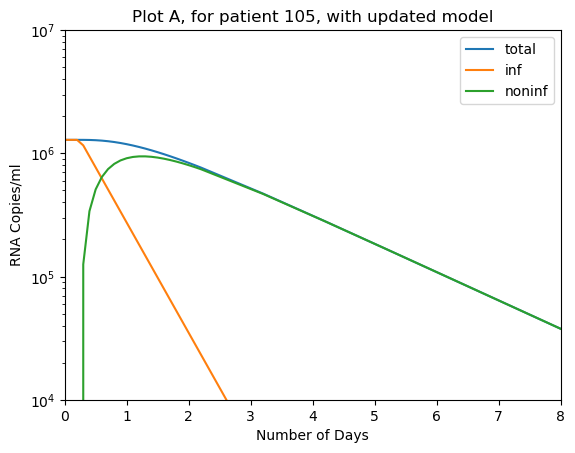

In [19]:
from scipy.integrate import odeint

def run_ode_solver(timepoints, V_i0, k, T0, delta, c, eta, delay):
    """Function template to help."""
    N = c/(k*T0) # I filled this in
    
    args = (
        k,
        T0,
        delta,
        c,
        N,
        eta,
        delay
    )
       
   
    T_star0 =  k*V_i0*T0/delta
    V_ni0 = 0  #V_ni0 = 0 #because probability at t = 0 is 0
    y0 = (T_star0, V_i0, V_ni0)

    return odeint(ode_func, y0, timepoints, args=args)

###################################################################
######################### For patient 105 #########################
###################################################################
tps = np.concatenate([np.arange(0, 2.2, 0.1), np.arange(2.2, 9, 1)])
T0 = 11*1000
V_i0 = 2*643*10**3 #v0 from paper, also scaling and multiplying by 2
delta = 0.53   #from 105 column
c = 2.06  #from 105 column
delay = 6/24  # from 105 column
k = 3.43*10**-8  # from paper
eta = 1 # told to keep 1 for now

solution = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

plt.yscale('log')
plt.ylim(1e4, 1e7)
plt.xlim(0, 8)

plt.plot(tps, solution[:, 1]+solution[:,2], label = 'total')
plt.plot(tps, solution[:, 1], label = 'inf')
plt.plot(tps, solution[:, 2], label = 'noninf')
plt.legend()
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.title("Plot A, for patient 105, with updated model")

#### iii. Reproduce the subpanels of Fig. 1 with this updated model. 

In [20]:
# Answer
tps = np.concatenate([np.arange(0, 2.2, 0.1), np.arange(2.2, 9, 1)])
#patient 105
print("Type of tps:", type(tps))
T0 = 11
# unsure, 1st col of 1583 was 11?
V_i0 = 2*643*10**3 #v0 from paper, also scaling and multiplying by 2
delta = 0.5   #from 105 column
c = 0.53  #from 105 column

delay = 6/24  # from 105 column
k = 3.43*10**-8  # from paper
eta = 1 # told to keep 1 for now

# odefunc, y0, timepoints, args = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay, mu)
solution = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)



Type of tps: <class 'numpy.ndarray'>


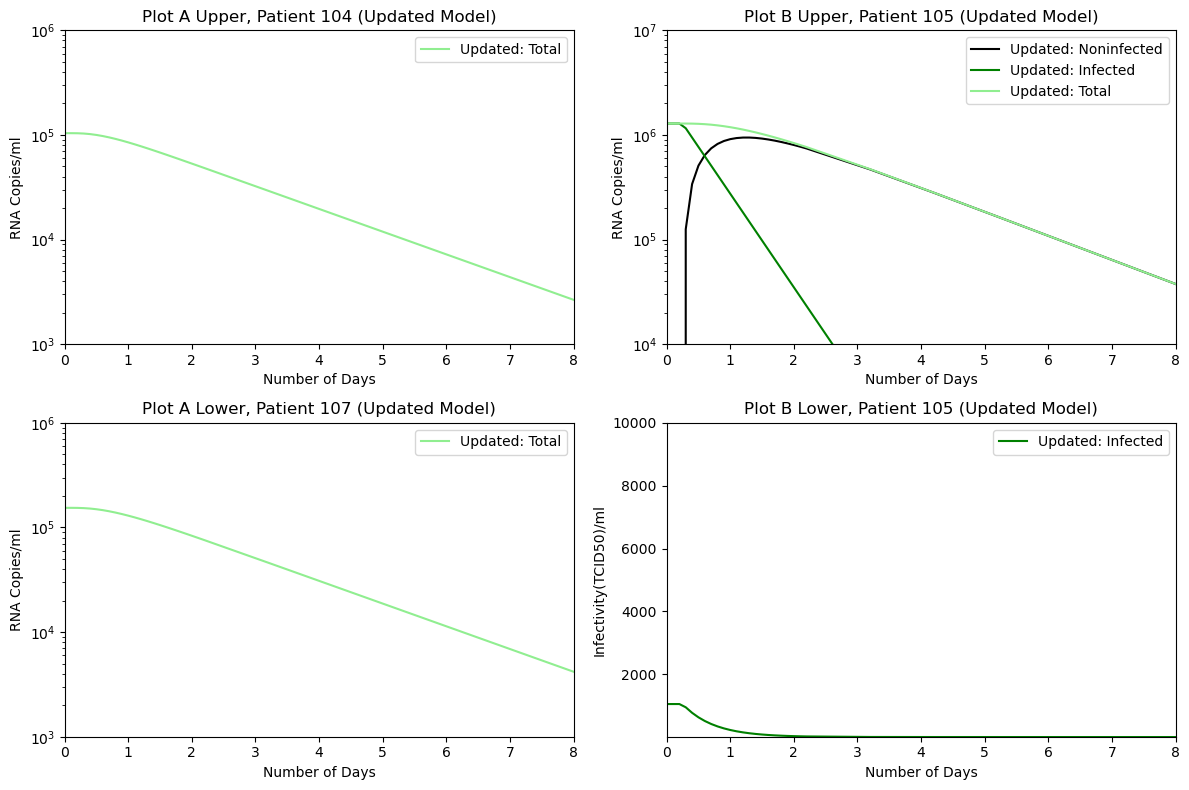

In [21]:
# using same tps, only need to define it once here at the top
tps = np.concatenate([np.arange(0, 2.2, 0.1), np.arange(2.2, 9, 1)])

# subplots
plt.figure(figsize=(12, 8))

####################################################################
################# FIRST GRAPH #################
####################################################################
plt.subplot(2, 2, 1)

T0 = 2*1000 #converting from mm^3 to ml
V_i0 = 2*52*10**3 #v0 from paper, also scaling and multiplying by 2
delta = 0.50   #from 104 column
c = 3.68  #from 104 column
delay = 2/24  # from 104 column
k = 3.43*10**-8  # from paper
eta = 1 # told to keep 1 for now
solution104 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

plt.yscale('log')
plt.ylim(1e3, 1e6)
plt.xlim(0, 8)

plt.plot(tps, solution104[:, 1]+solution104[:,2], color = 'lightgreen', label = 'Updated: Total')
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.title('Plot A Upper, Patient 104 (Updated Model)')
plt.legend()

####################################################################
################# SECOND GRAPH #################
####################################################################
plt.subplot(2, 2, 2)
T0 = 11*1000 #converting from mm^3 to ml
V_i0 = 2*643*10**3 #v0 from paper, also scaling and multiplying by 2
delta = 0.53   #from 105 column
c = 2.06  #from 105 column
delay = 6/24  # from 105 column
k = 3.43*10**-8  # from paper
eta = 1 # told to keep 1 for now
solution105 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

plt.yscale('log')
plt.ylim(1e4, 1e7)
plt.xlim(0, 8)

plt.plot(tps, solution105[:, 2], color = 'k', label = 'Updated: Noninfected')
plt.plot(tps, solution105[:, 1], color = 'green', label = 'Updated: Infected')
plt.plot(tps, solution105[:, 1]+solution105[:,2], color = 'lightgreen', label = 'Updated: Total')
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.title('Plot B Upper, Patient 105 (Updated Model)')
plt.legend()

####################################################################
################# THIRD GRAPH #################
####################################################################
plt.subplot(2, 2, 3)

T0 = 412*1000 #converting from mm^3 to ml
V_i0 = 2*77*10**3 #v0 from paper, also scaling and multiplying by 2
delta = 0.50   #from 107 column
c = 3.09  #from 107 column
delay = 2/24  # from 107 column
k = 3.43*10**-8  # from paper
eta = 1 # told to keep 1 for now
solution107 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

plt.yscale('log')
plt.ylim(1e3, 1e6)
plt.xlim(0, 8)

plt.plot(tps, solution107[:, 1]+solution107[:,2], color = 'lightgreen', label = 'Updated: Total')
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.legend()
plt.title('Plot A Lower, Patient 107 (Updated Model)')

####################################################################
################# FOURTH GRAPH #################
####################################################################
plt.subplot(2, 2, 4)

V_i0 = 2*643*10**3
plt.plot(tps, solution105[:, 1]*(1.05*10**3)/V_i0, color = 'green', label = 'Updated: Infected')

plt.ylim(1e1, 1e4)
plt.xlim(0, 8)
plt.xlabel("Number of Days")
plt.ylabel("Infectivity(TCID50)/ml")
plt.title('Plot B Lower, Patient 105 (Updated Model)')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

#### iv. Are the results essentially the same as in (1)?

Show evidence of your conclusion.

## Yes, they're essentially the same. The graphs looks the same: here's how the old vs new model looks when we plot it over the other. Here they are, overlaid.

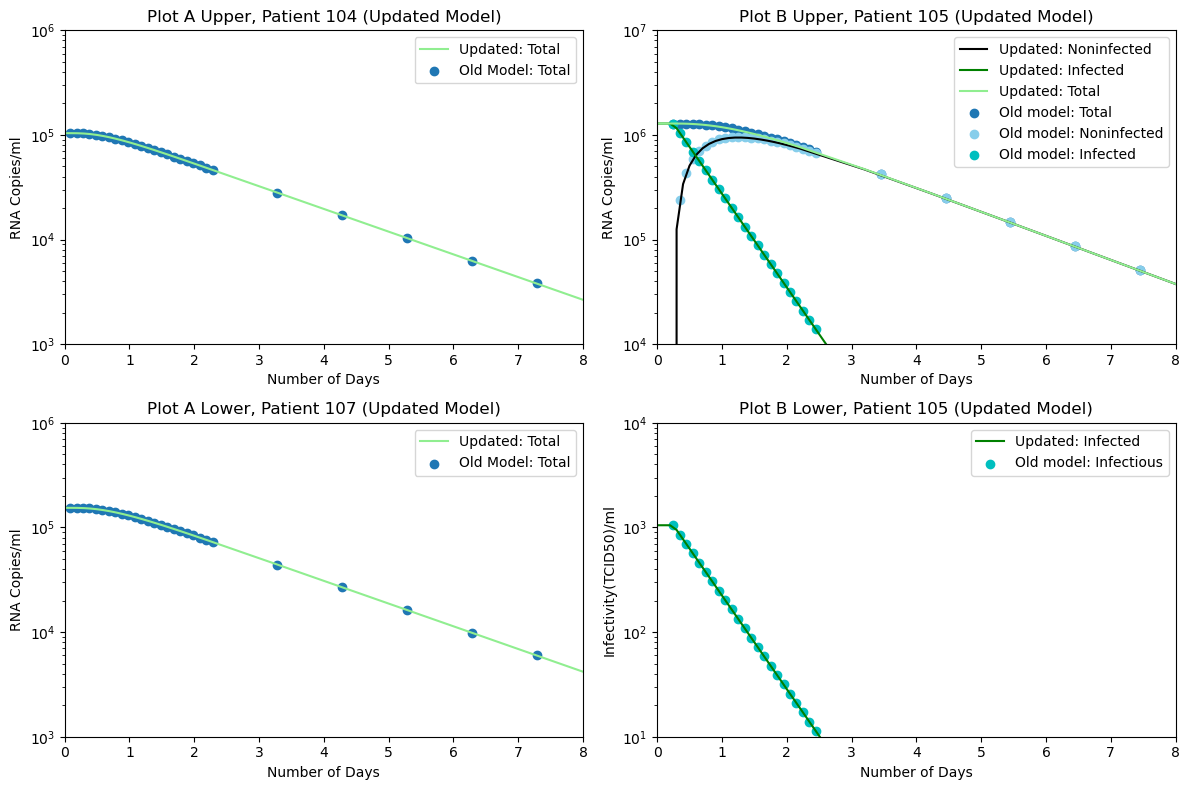

In [22]:
# using same tps, only need to define it once here at the top
tps = np.concatenate([np.arange(0, 2.2, 0.1), np.arange(2.2, 9, 1)])

# subplots
plt.figure(figsize=(12, 8))

####################################################################
################# FIRST GRAPH #################
####################################################################
plt.subplot(2, 2, 1)

T0 = 2*1000 #converting from mm^3 to ml
V_i0 = 2*52*10**3 #v0 from paper, also scaling and multiplying by 2
delta = 0.50   #from 104 column
c = 3.68  #from 104 column
delay = 2/24  # from 104 column
k = 3.43*10**-8  # from paper
eta = 1 # told to keep 1 for now
solution104 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)
plt.plot(tps, solution104[:, 1]+solution104[:,2], color = 'lightgreen', label = 'Updated: Total')

####################################################################

delay = 2/24
v0 = 2*52* 10**3 #doubling then putting in right units
v1, vn1, v = equation_6(tps, v0, 3.68, 0.50, delay, 1)
plt.scatter(tps+delay, v, label = 'Old Model: Total') #manually shifting because of delay

plt.yscale('log')
plt.ylim(1e3, 1e6)
plt.xlim(0, 8)
plt.legend()

plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.title('Plot A Upper, Patient 104 (Updated Model)')
plt.legend()

####################################################################
################# SECOND GRAPH #################
####################################################################
plt.subplot(2, 2, 2)
T0 = 11*1000 #converting from mm^3 to ml
V_i0 = 2*643*10**3 #v0 from paper, also scaling and multiplying by 2
delta = 0.53   #from 105 column
c = 2.06  #from 105 column
delay = 6/24  # from 105 column
k = 3.43*10**-8  # from paper
eta = 1 # told to keep 1 for now
solution105 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

plt.yscale('log')
plt.ylim(1e4, 1e7)
plt.xlim(0, 8)

plt.plot(tps, solution105[:, 2], color = 'k', label = 'Updated: Noninfected')
plt.plot(tps, solution105[:, 1], color = 'green', label = 'Updated: Infected')
plt.plot(tps, solution105[:, 1]+solution105[:,2], color = 'lightgreen', label = 'Updated: Total')
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")

####################################################################

tps_105 = np.concatenate([np.arange(0, 2.2, 0.1), np.arange(2.2, 9, 1)])
v1_105, vn1_105, v_105 = equation_6(tps, 643*2*10**3, 2.06, 0.53, 6/24, 1)
plt.scatter(tps_105+delay, v_105, label = 'Old model: Total')
plt.scatter(tps_105+delay, vn1_105, color = 'skyblue', label = 'Old model: Noninfected')
plt.scatter(tps_105+delay, v1_105, color = 'c', label = 'Old model: Infected')

plt.title('Plot B Upper, Patient 105 (Updated Model)')
plt.legend()

####################################################################
################# THIRD GRAPH #################
####################################################################
plt.subplot(2, 2, 3)

T0 = 412*1000 #converting from mm^3 to ml
V_i0 = 2*77*10**3 #v0 from paper, also scaling and multiplying by 2
delta = 0.50   #from 107 column
c = 3.09  #from 107 column
delay = 2/24  # from 107 column
k = 3.43*10**-8  # from paper
eta = 1 # told to keep 1 for now
solution107 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

plt.plot(tps, solution107[:, 1]+solution107[:,2], color = 'lightgreen', label = 'Updated: Total')
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")

####################################################################

v0 = 2*77*10**3 #doubling then putting in right units
delay = 2/24
v1, vn1, v = equation_6(tps, v0, 3.09, 0.50, 2/24, 1)
plt.scatter(tps+delay, v, label = 'Old Model: Total') #manually shifting because of delay

plt.yscale('log')
plt.ylim(1e3, 1e6)
plt.xlim(0, 8)
plt.legend()
plt.title('Plot A Lower, Patient 107 (Updated Model)')

####################################################################
################# FOURTH GRAPH #################
####################################################################
plt.subplot(2, 2, 4)

V_i0 = 2*643*10**3
plt.plot(tps, solution105[:, 1]*(1.05*10**3)/V_i0, color = 'green', label = 'Updated: Infected')

####################################################################

delay = 6/24
v0 = 643*2*10**3
v1, vn1, v = equation_6(tps, v0, 2.06, 0.53, 6/24, 1)
plt.scatter(tps+delay, (v1*1.05*10**3)/v0, color = 'c', label = 'Old model: Infectious') # already multipliedby 10^3 somewhere

plt.yscale('log')
plt.ylim(1e1, 1e4)
plt.xlim(0, 8)
plt.xlabel("Number of Days")
plt.ylabel("Infectivity(TCID50)/ml")
plt.title('Plot B Lower, Patient 105 (Updated Model)')
plt.legend()

###########
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

### (4) Repeat the work that the authors describe in item 12 of their “References and Notes”.

#### (i) Namely, vary the effectiveness factor of the drug (η=1.0, 0.99, 0.95, and 0.90) and simulate the viral load that would result from the modified differential equations using the parameters c=3.0 1/days and δ=0.5 1/days as described in item 12 and the values of T0, V0, and the time delay provided for patient 105.

Type of tps: <class 'numpy.ndarray'>


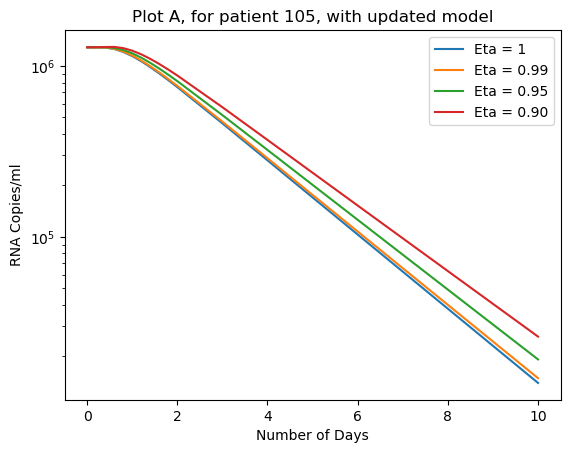

In [26]:
# Answer
tps = np.concatenate([np.arange(0, 2.2, 0.2), np.arange(2, 11, 1)])
#patient 105
print("Type of tps:", type(tps))
T0 = 11*1000 # scaled from mm^3 to ml
V_i0 = 2*643*10**3 #v0 from paper
delta = 0.5  #changed
c = 3.0  #changed

delay = 6/24  # from 105 column
k = 3.43*10**-8  # from paper

eta = 1 # for first time
solution_105eta1 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

eta = 0.99
solution_105eta99 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

eta = 0.95
solution_105eta95 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

eta = 0.90
solution_105eta90 = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)

plt.yscale('log')
plt.plot(tps, solution_105eta1[:,1]+solution_105eta1[:,2], label = 'Eta = 1')
plt.plot(tps, solution_105eta99[:,1]+solution_105eta99[:,2], label = 'Eta = 0.99')
plt.plot(tps, solution_105eta95[:,1]+solution_105eta95[:,2], label = 'Eta = 0.95')
plt.plot(tps, solution_105eta90[:,1]+solution_105eta90[:,2], label = 'Eta = 0.90')
plt.xlabel("Number of Days")
plt.ylabel("RNA Copies/ml")
plt.title("Plot A, for patient 105, with updated model")
plt.legend()
plt.show()

# Observe that the slope of the line (RNA copies with respect to number of days) decreases when eta decreases.

#### (ii) Then, use the function `scipy.optimize.leastsq` to fit this data to the equation for V(t) given in the paper and find the estimates of c and δ that result. Fit only the portion of the curve after the pharmacokinetic delay. Compare these estimates to the actual values for c and δ and discuss how an imperfect drug would affect the clearance time estimates.

In [24]:
# Answer

return lsq = predicted - actual
compare vpred - vactual

actual is given

run ode, get v1, vn1, v = this is our actual

our predicted is going to be when we run the ode, but now we're going to allow the c and the delta to change
lsqeta100 = lsq function (use the scifi one) (funct, [c,delta], args = eta)

In [56]:
from scipy.optimize import least_squares as lsq
tps = np.concatenate([np.arange(0, 2.2, 0.1), np.arange(2.2, 9, 1)])
c = 2.06
delta = 0.53
delay = 6/24 #converting to hours
V_i0 = 2*643* 10**3 #doubling then putting in right units
eta = 1
solution = run_ode_solver(tps, V_i0, k, T0, delta, c, eta, delay)
actual = solution[:,1]+solution[:,2]

# def leastsq_func(parameters, eta):
#     predicted = run_ode_solver(tps, parameters, eta, delay)
#     return predicted - actual

    
# predicts = lsq(leastsq_func, np.array([3, 0.5]), args = (V_i0, eta, tps))
# print(predicts.x)

# def leastsq_func(parameters, tps, V_i0, eta, delay):
#     predicted = run_ode_solver(tps, V_i0, parameters, T0, delta, c, eta, delay)
#     return predicted[:, 1] - actual

# # Use least_squares with appropriate arguments
# initial_params = np.array([3, 0.5])
# predicts = lsq(leastsq_func, initial_params, args=(tps, V_i0, eta, delay))

# print("Optimized Parameters:", predicts.x)

def leastsq_func(initial_params, eta):
    predicted = run_ode_solver(tps, V_i0, k, T0, delta, initial_params[0], eta, initial_params[1])
    return (predicted[:, 1]+predicted[:, 2]) - actual

# Use least_squares with appropriate arguments
initial_params = np.array([3, 0.5])
etas = np.array([1])
for i in range(1):
    predicts = lsq(leastsq_func, initial_params, args=([etas[i]]))

print("Optimized Parameters:", predicts.x)

Optimized Parameters: [2.57775297 0.39922603]
